## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import datasets

In [2]:
# !pip install kagglehub

In [3]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("sumanthvrao/daily-climate-time-series-data")

# print("Path to dataset files:", path)

In [4]:
df = pd.read_csv("DailyDelhiClimateTest.csv")
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


## Plot

In [5]:
df.columns

Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

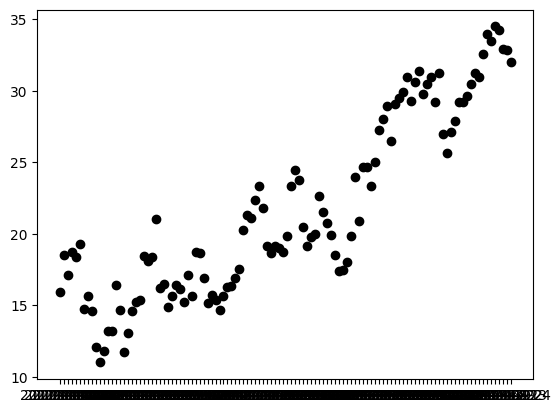

In [6]:
plt.scatter(df['date'], df['meantemp'], label='actual_tmp', color='black')

## Exponential Smoothing

In [7]:
x_ewma = df['meantemp'].ewm(alpha=0.1)
x_ewma = x_ewma.mean()

## Plot multiple curves at diff alpha vals

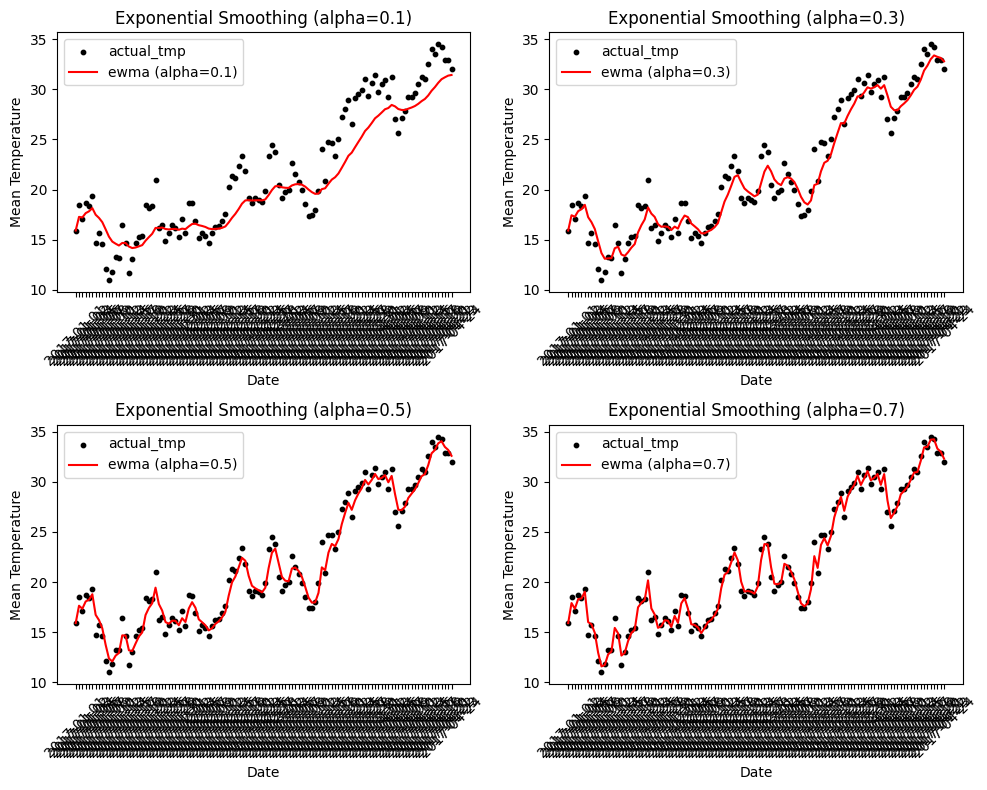

In [8]:
alphas = [0.1, 0.3, 0.5, 0.7]
plt.figure(figsize=(10, 8))

for i, alpha in enumerate(alphas, 1):
    x_ewma_alpha = df['meantemp'].ewm(alpha=alpha).mean()
    plt.subplot(2, 2, i)
    plt.scatter(df['date'], df['meantemp'], label='actual_tmp', color='black', s=10)
    plt.plot(df['date'], x_ewma_alpha, label=f'ewma (alpha={alpha})', color='red')
    plt.title(f'Exponential Smoothing (alpha={alpha})')
    plt.xlabel('Date')
    plt.ylabel('Mean Temperature')
    plt.legend()
    plt.xticks(rotation=45)

plt.tight_layout()